In [93]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('./train.csv',sep=';')
df_test = pd.read_csv('./test.csv',sep=';')
df = df_train.append(df_test)
df = df.drop(['day_of_week'], axis = 1)
df.tail(10)
#df.job.value_counts()  # rest unknown ?done
#df.education.value_counts()#unknown set middle,      done
#df.marital.value_counts() # set unknown married     done
#df.housing."value_counts()#set unknown 0             done
#df.loan.value_counts() #unknown set no             done
#df.contact.value_counts() #nounknown                done
#df.duration.value_counts() #nounknown
#df.pdays.value_counts() #999:0,other:1
#df.poutcome.value_counts() #noexistent:0,success:1,failure:-1


df.y.value_counts()#Unbalanced Data!!




no     2668
yes     331
Name: y, dtype: int64

In [85]:
#df['job'] = df['job'].map({'unemployed':2, 'student': 4,'housemaid':6, 'blue-collar':8, 'services':10, 'retired': 12, 'self-employed':14,'admin.':16,'technician':18,'management': 20, 'entrepreneur':22,'unknown': 13 }).astype(int)
#df = pd.concat([df, pd.get_dummies(df['job'], prefix='job')], axis=1)
#df = pd.concat([df, pd.get_dummies(df['day_of_week'], prefix='day_of_week')], axis=1)
from sklearn.preprocessing import MinMaxScaler

df['education'] = df['education'].map({'illiterate':0,'basic.4y':3,'basic.6y':4,'basic.9y':5,'high.school':8,'university.degree':15,'professional.course':20, 'unknown':10}).astype(int)

#df['marital'] = df['marital'].replace('unknown','married');
df = pd.concat([df, pd.get_dummies(df['marital'], prefix='marital')], axis=1)

df = pd.concat([df, pd.get_dummies(df['month'], prefix='month')], axis=1)

#df['housing'] = df['housing'].map({'yes':1,'no':0,'unknown':0.5}).astype(int)
#df['loan'] = df['loan'].replace('unknown','no')
#df['loan'] = df['loan'].map({'yes':1,'no':0}).astype(int)

df['default'] = df['default'].replace('unknown','no')
df['default'] = df['default'].map({'yes':1,'no':0}).astype(int)

df = pd.concat([df, pd.get_dummies(df['contact'], prefix='contact')], axis=1)

df.loc[df['pdays'] < 449, 'pdays'] = 1
df.loc[df['pdays'] < 998, 'pdays'] = 0.5
df.loc[df['pdays'] > 998, 'pdays'] = 0

df['poutcome'] = df['poutcome'].map({'success':1,'nonexistent':0, 'failure':-1}).astype(int)

df[['age','education', 'duration', 'campaign','emp.var.rate', 'cons.price.idx', 'cons.conf.idx','euribor3m', 'nr.employed']]=MinMaxScaler().fit_transform(df[['age', 'education','duration', 'campaign',  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                                 'euribor3m', 'nr.employed']])

df['y'] = df['y'].map({'yes':1,'no':0})
df['y0'] = df['y']
df = df.drop(['housing','loan','job','marital','contact','month','y'], axis = 1)
df.head(10)
df.columns

Index(['age', 'education', 'default', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'marital_divorced',
       'marital_married', 'marital_single', 'marital_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'contact_cellular',
       'contact_telephone', 'y0'],
      dtype='object')

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import matthews_corrcoef
train_data = df.values[:2999]
x = train_data[:,:28]
y = train_data[:, 29]
X_train, X_test, y_train, y_test = train_test_split(x,y)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
scaler.fit(X_test)
X_test_s=scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
n = 15
nn = 1200
model1 = RandomForestClassifier(n_estimators=nn,oob_score=True,max_features=n,max_depth=None)
model1.fit(X_train_s,y_train)
y_predict = model1.predict(X_test_s)
matthews_corrcoef(y_test,y_predict)
        

0.57978352819004908

In [91]:
from sklearn.neural_network import MLPClassifier
model2 = MLPClassifier(max_iter=10000,hidden_layer_sizes=(1100,),activation='logistic')
model2.fit(X_train_s,y_train)
y_predict = model2.predict(X_test_s)
matthews_corrcoef(y_test,y_predict)

0.55894822058540217

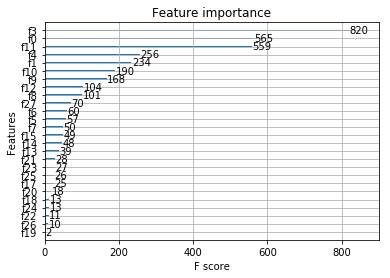

99 /t 0.622473653489


In [92]:
import xgboost
from xgboost import XGBClassifier 
from matplotlib import pyplot
model3 = XGBClassifier( 
     learning_rate =0.05,
     n_estimators=200,
     max_depth=5,
     min_child_weight=1,
     gamma=0.1,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=4,
     scale_pos_weight=1,
     seed=27)

model3 = model3.fit(X_train_s,y_train)
xgboost.plot_importance(model3)
pyplot.show()
y_predict = model3.predict(X_test_s)
print(n_e,"/t",matthews_corrcoef(y_test,y_predict))

In [89]:
#Choose the model3 as the final model to be trained(XGBOOST model)
X_Train = train_data[:,:28]
Y_Train = train_data[:, 29]
test_data = df.values[2999:]
X_Test = test_data[:,:28]
print(len(X_Test[0]))
print(len(X_Train[0]))

scaler = StandardScaler()
scaler.fit(X_Train)
X_Train_s = scaler.transform(X_Train)
scaler.fit(X_Test)
X_Test_s=scaler.transform(X_Test)

model3 = model3.fit(X_Train_s, Y_Train)
output = model3.predict(X_Test_s)
result = np.c_[output.astype(int)]
df_result = pd.DataFrame(result[:,0], columns=['prediction'])
df_result.head(100)

28
28


,prediction
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [318]:
df_result.to_csv('./marketpredict-6.csv', index=False)